# EDA

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Set up plotting style
plt.style.use('seaborn')
sns.set_style("whitegrid")

C:\Users\ACER\AppData\Local\Temp\ipykernel_15444\3792456594.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
ct_path = "../data/3702_left_knee.nii.gz"
mask_path = "../data/original_mask.nii.gz"

## Step 1: Load and Inspect Files

In [5]:
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data, img.header, img.affine

In [6]:
# Load CT scan and mask
ct_data, ct_header, ct_affine = load_nifti(ct_path)
mask_data, mask_header, mask_affine = load_nifti(mask_path)

In [25]:
print(f"Mask Unique Values: {np.unique(mask_data)}")

Mask Unique Values: [0. 1. 2.]


In [7]:
# Print basic information
print("=== CT Scan Info ===")
print(f"Shape: {ct_data.shape}")
print(f"Data Type: {ct_data.dtype}")
print(f"Voxel Spacing: {ct_header.get_zooms()}")
print(f"Affine Matrix:\n{ct_affine}")

=== CT Scan Info ===
Shape: (512, 512, 216)
Data Type: float64
Voxel Spacing: (0.869141, 0.869141, 2.0)
Affine Matrix:
[[-8.69140983e-01  0.00000000e+00  0.00000000e+00  2.22500000e+02]
 [ 0.00000000e+00 -8.69140983e-01  0.00000000e+00  2.22500000e+02]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00 -9.00500000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [8]:
print("\n=== Mask Info ===")
print(f"Shape: {mask_data.shape}")
print(f"Data Type: {mask_data.dtype}")
print(f"Voxel Spacing: {mask_header.get_zooms()}")
print(f"Affine Matrix:\n{mask_affine}")


=== Mask Info ===
Shape: (512, 512, 216)
Data Type: float64
Voxel Spacing: (0.869141, 0.869141, 2.0)
Affine Matrix:
[[-8.69140983e-01  0.00000000e+00  0.00000000e+00  2.22500000e+02]
 [ 0.00000000e+00 -8.69140983e-01  0.00000000e+00  2.22500000e+02]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00 -9.00500000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [9]:
# Check if shapes match
if ct_data.shape != mask_data.shape:
    print("Warning: CT scan and mask dimensions do not match!")

## Step 2: Statistical Analysis

In [10]:
# CT scan statistics
ct_stats = {
    'Min': np.min(ct_data),
    'Max': np.max(ct_data),
    'Mean': np.mean(ct_data),
    'Std': np.std(ct_data),
    'Median': np.median(ct_data)
}
print("\n=== CT Scan Statistics ===")
for key, value in ct_stats.items():
    print(f"{key}: {value:.2f}")


=== CT Scan Statistics ===
Min: -3024.00
Max: 1769.00
Mean: -1112.66
Std: 725.66
Median: -1000.00


In [11]:
# Mask unique values
unique_mask_values = np.unique(mask_data)
print("\n=== Mask Unique Values ===")
print(unique_mask_values)


=== Mask Unique Values ===
[0. 1. 2.]


In [ ]:
# Region-specific statistics
regions = {
    'Tibia': mask_data == 2,  # Assuming 2 for Tibia (green)
    'Femur': mask_data == 1,  # Assuming 1 for Femur (red)
    'Background': mask_data == 0
}
region_stats = {}
for region_name, region_mask in regions.items():
    region_data = ct_data[region_mask]
    if region_data.size > 0:
        region_stats[region_name] = {
            'Voxel Count': region_data.size,
            'Min': np.min(region_data),
            'Max': np.max(region_data),
            'Mean': np.mean(region_data),
            'Std': np.std(region_data)
        }
    else:
        region_stats[region_name] = {'Voxel Count': 0, 'Min': np.nan, 'Max': np.nan, 'Mean': np.nan, 'Std': np.nan}

print("\n=== Region-Specific Statistics ===")
for region_name, stats in region_stats.items():
    print(f"\n{region_name}:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if not np.isnan(value) else f"{key}: {value}")


=== Region-Specific Statistics ===

Tibia:
Voxel Count: 274610.00
Min: -134.00
Max: 1702.00
Mean: 513.05
Std: 419.19

Femur:
Voxel Count: 244016.00
Min: -235.00
Max: 1769.00
Mean: 565.11
Std: 457.58

Background:
Voxel Count: 56104478.00
Min: -3024.00
Max: 1746.00
Mean: -1127.91
Std: 710.12


## Step 3: Visualization

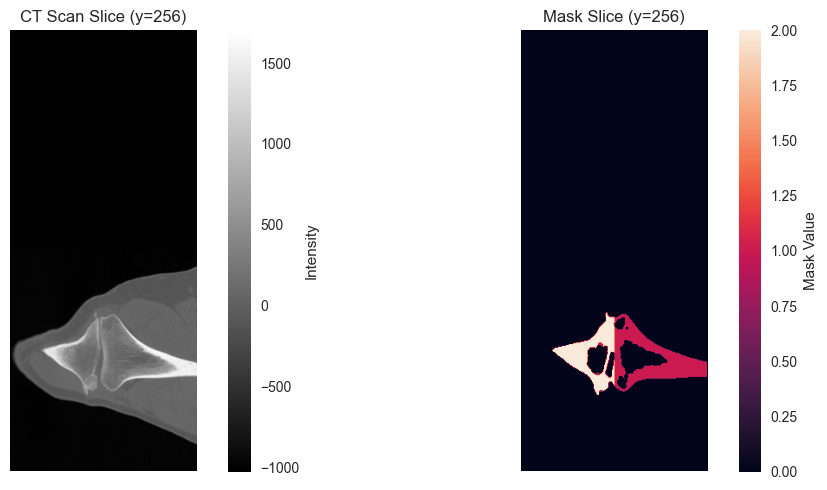

In [13]:
y_slice = ct_data.shape[1] // 2

plt.figure(figsize=(12, 5))

# CT scan slice
plt.subplot(1, 2, 1)
plt.imshow(ct_data[:, y_slice, :], cmap='gray')
plt.title(f"CT Scan Slice (y={y_slice})")
plt.colorbar(label='Intensity')
plt.axis('off')

# Mask slice
plt.subplot(1, 2, 2)
plt.imshow(mask_data[:, y_slice, :])
plt.title(f"Mask Slice (y={y_slice})")
plt.colorbar(label='Mask Value')
plt.axis('off')

plt.tight_layout()
# plt.savefig('slices.png')
plt.show()

# Step 4: Data Integrity Checks

In [ ]:
# Check for unexpected mask values
if len(unique_mask_values) > 3:
    print("Warning: Mask contains unexpected values. Expected 0, 1, 2 for Background, Tibia, Femur.")

# Check alignment (affine matrices)
if not np.allclose(ct_affine, mask_affine):
    print("Warning: Affine matrices of CT scan and mask differ. Possible misalignment.")

----
## Visualizig & Checking MASK

- Femur(val=1): Red
- Tibia(val=2): Green

In [ ]:
# Function to visualize coronal slices
def visualize_slices(ct_data, mask_data, y, tibia_val=2, femur_val=1):
    plt.style.use('seaborn')
    
    
    plt.figure(figsize=(15, 10))

    # CT scan coronal slice
    plt.subplot(1, 3, 1)
    plt.imshow(ct_data[:, y, :].T, cmap='gray', origin='lower')
    plt.title(f"CT Scan\nCoronal Slice (y={y})")
    plt.colorbar(label='Intensity')
    plt.axis('off')

    
    mask_slice = mask_data[:, y, :].T
    mask_rgb = np.zeros((mask_slice.shape[0], mask_slice.shape[1], 3))
    mask_rgb[mask_slice == tibia_val] = [0, 1, 0]  # Green for tibia (value=2)
    mask_rgb[mask_slice == femur_val] = [1, 0, 0]  # Red for femur (value=1)
    mask_rgb[mask_slice == 0] = [0, 0, 0]  # Black for background
    plt.subplot(1, 3, 2)
    plt.imshow(mask_rgb)
    plt.title(f"Mask\nGreen=Tibia (val={tibia_val}), Red=Femur (val={femur_val})")
    plt.axis('off')

    # Overlay with inverted colors
    plt.subplot(1, 3, 3)
    plt.imshow(ct_data[:, y, :].T, cmap='gray', origin='lower', alpha=1.0)
    plt.imshow(mask_rgb, alpha=0.4)
    plt.title(f"Overlay\nCoronal Slice (y={y})")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig(f'coronal_slice_y{y}.png')
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15444\910501333.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


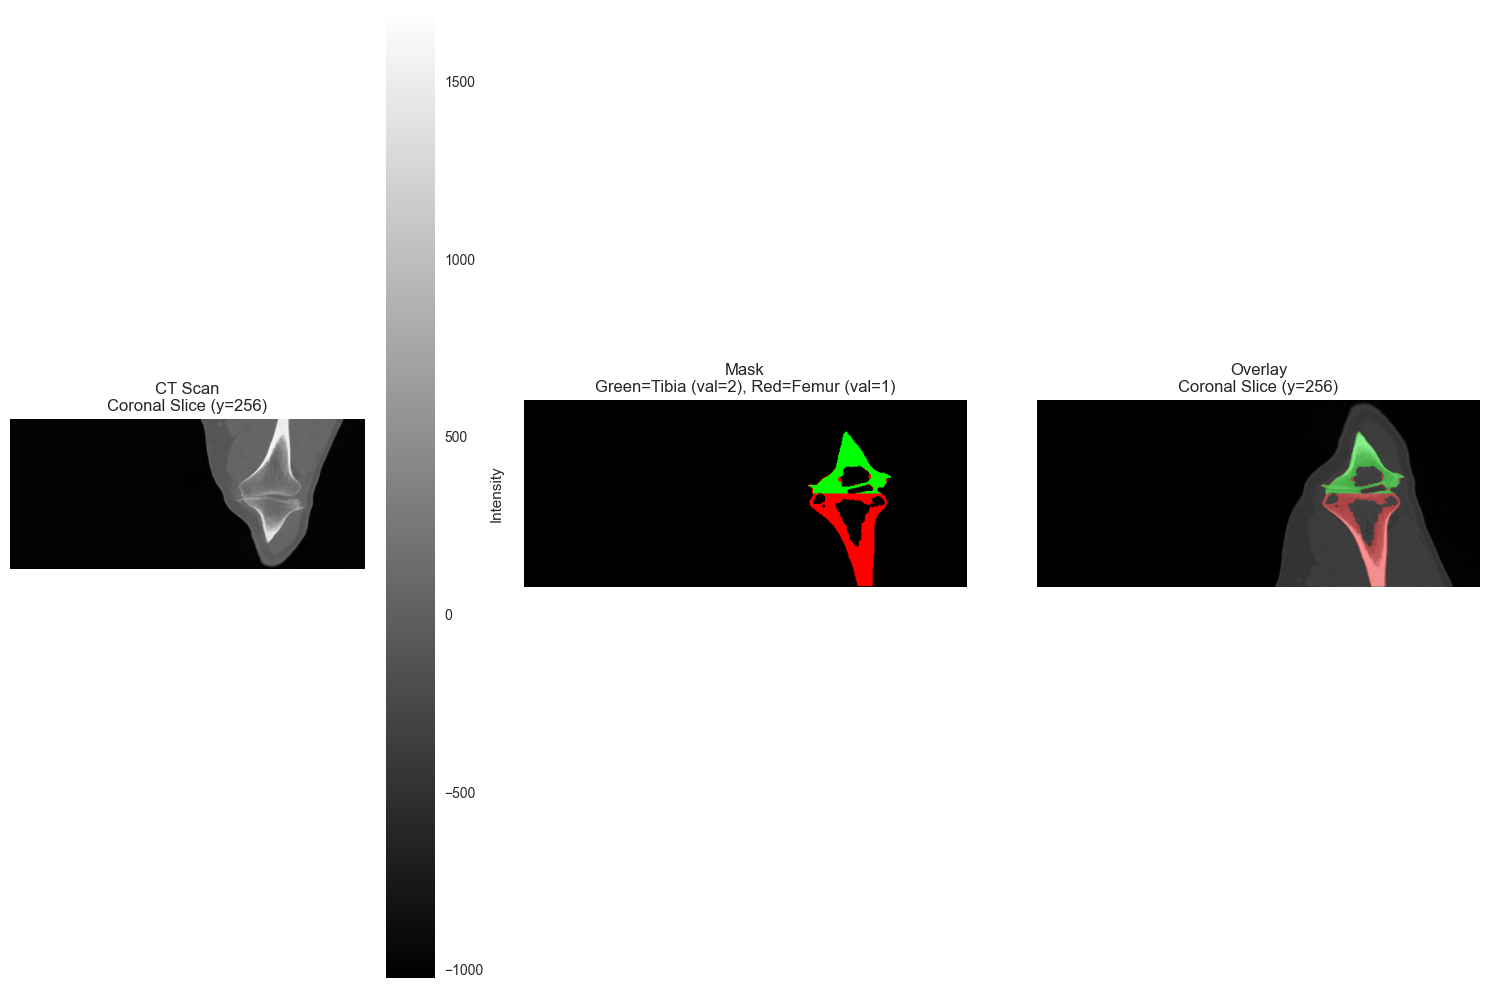

In [24]:
visualize_slices(ct_data, mask_data, 256, tibia_val=2, femur_val=1)